# 3. Cancer


Entrena distintos clasificadores de tumores de seno y evalúalos tanto con el subconjunto de
entrenamiento como con el subconjunto de validación y discute su desempeño. Existen 16 registros
en el conjunto de datos con un atributo no especificado. Investiga estrategias para rellenar los datos
faltantes, utiliza las que consideres más adecuadas para este problema y discute el impacto en el


In [ ]:
import pandas as pd 
import numpy as np, random

# I will use it as a dataframe for convenience
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
data.columns = ['Sample code number','Clump Thickness','Uniformity Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

#var to help me split the data easier with sklearn
column_names = ['Sample code number','Clump Thickness','Uniformity Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

#replace '?' for NaN values
data=data.replace(to_replace='?',value=np.nan)
missing = pd.isna(data).sum()
print(missing)
#print(data.head(50)) #missing value 23
#data.loc[:,].boxplot(figsize=(10,5), rot=90)


Sample code number              0
Clump Thickness                 0
Uniformity Cell Size            0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [ ]:
#Fill NaN with mean values of the Bare Nuclei column 
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']) # convertir la columna a tipo numerico (estaba en str)
data['Bare Nuclei'] = round(data['Bare Nuclei'].fillna(data['Bare Nuclei'].mean()),2)
missing = pd.isna(data).sum()
print(missing)
data.head(25) ## 16 values filled with the mean (3.548387)

Sample code number             0
Clump Thickness                0
Uniformity Cell Size           0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


,Sample code number,Clump Thickness,Uniformity Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10.00,3,2,1,2
1,1015425,3,1,1,1,2,2.00,3,1,1,2
2,1016277,6,8,8,1,3,4.00,3,7,1,2
3,1017023,4,1,1,3,2,1.00,3,1,1,2
4,1017122,8,10,10,8,7,10.00,9,7,1,4
5,1018099,1,1,1,1,2,10.00,3,1,1,2
6,1018561,2,1,2,1,2,1.00,3,1,1,2
7,1033078,2,1,1,1,2,1.00,1,1,5,2
8,1033078,4,2,1,1,2,1.00,2,1,1,2
9,1035283,1,1,1,1,1,1.00,3,1,1,2


Divide aleatoriamente el conjunto de datos en el 60 % para entrenamiento, el 20 % para validación
y el 20 % restante para prueba

In [ ]:
#Easier with split() and sample() bc is a dataframe
np.random.seed(0)
#darle shuffle al dataset 
data = data.sample(frac=1, random_state=42) 

#Dividir para 60, 20 y 20
train, validate, test = \
              np.split(data.sample(frac=1, random_state=42), 
                       [int(.6*len(data)), int(.8*len(data))])

In [ ]:
#split data with skelearn (use method twice to get 3 subsets)
from sklearn.model_selection  import train_test_split

y_outputs = data.iloc[:, 1].values
x, x_test, y, y_test = train_test_split(data[column_names[1:10]],y_outputs,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

#X_train, X_test, y_train, y_test=train_test_split(data[column_names[1:10]],data[column_names[10]],test_size=0.40, random_state=42)
# print(y_train)
# print(y_test)
# print(y_cv)

Utilizando una distrubución normal gaussiana con sklearn

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
naive_bayes = GaussianNB().fit(x_train, y_train)

# print("Predicciones con Datos de Entrenamiento")
# print(naive_bayes.predict(x_train))
# print("Salidas de Entrenamiento")
# print(y_train)
# print("Predicciones con Datos de Test")
# print(naive_bayes.predict(x_test))
# print("Salidas de Test")
# print(y_test)

accuracy = naive_bayes.score(x_test,y_test)
print(accuracy) # 1?


1.0


Implementación (completo)

Accuracy:  0.9571428571428572
F1 Score:  0.9516116644051307
Recall:  0.9605991023901472
Precision:  0.9441425120772947
R2_score:  0.8027345788539819


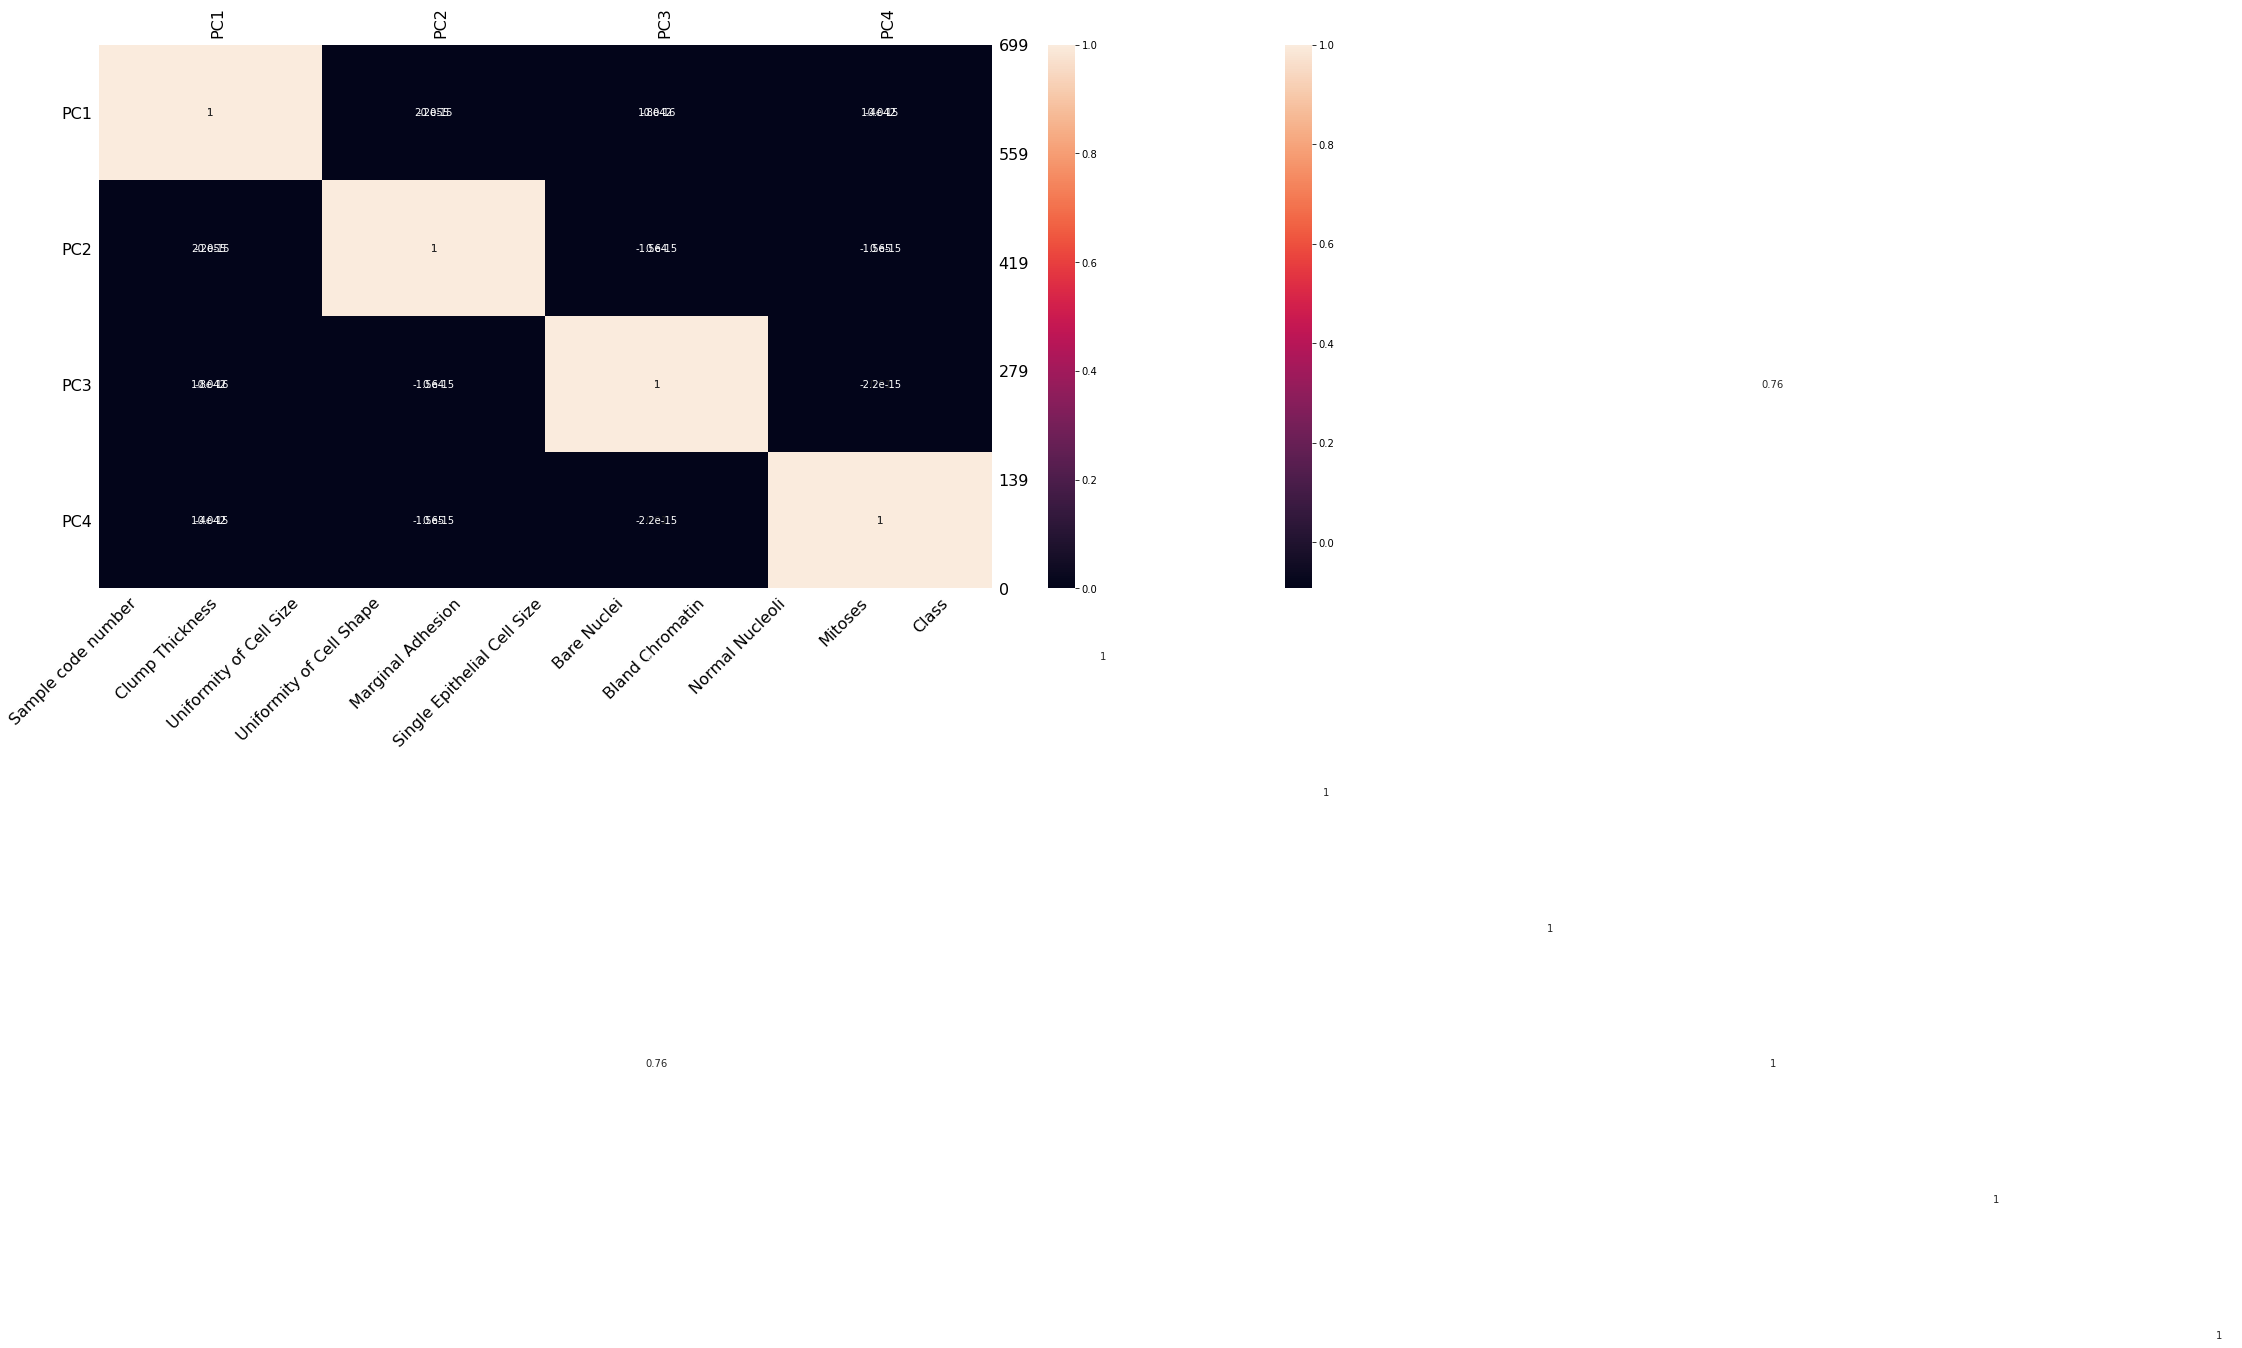

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, r2_score

import missingno as msn
import seaborn as sns


def fill_missing_values(df):
    for column in df:
        df[column] = df[column].replace(to_replace="?", value=np.nan)
        df[column] = df[column].fillna(int(df[column].mode()[0]))
        df[column] = df[column].astype(int)
    df.astype('int32').dtypes
    msn.bar(df)
    return df


def split_data(df):
    X = df.iloc[:, 0:10]
    # print(X)
    Y = (df.iloc[:, 10]).values
    # print(Y)
    return X, Y


def heat_map(X): #could not use
    # to know correlation among features
    sns.heatmap(X.corr(), annot=True)


def countplot(Y, df):
    # count of each class
    sns.countplot(y=Y, data=df)


def PCA(X_scaled, Y):
    features = X_scaled.T
    # features
    covmat = np.cov(features)
    # covmat
    values, vectors = np.linalg.eig(covmat)
    pt_var = []
    for i in range(len(values)):
        pt_var.append(values[i]/np.sum(values))
    # pt_var
    projected_1 = X_scaled.dot(vectors.T[0])
    projected_2 = X_scaled.dot(vectors.T[1])
    projected_3 = X_scaled.dot(vectors.T[3])
    projected_4 = X_scaled.dot(vectors.T[5])
    res = pd.DataFrame(data=projected_1, columns=["PC1"])
    res["PC2"] = projected_2
    res["PC3"] = projected_3
    res["PC4"] = projected_4
    res["Class"] = Y
    check = res[["PC1", "PC2", "PC3", "PC4"]]
    sns.heatmap(check.corr(), annot=True)
    # check
    return res, check


def train_predict_naivebayes(check, res):
    X_f = check
    Y_f = res["Class"]
    # print(X_f)
    # print(Y_f)
    X_train, X_test, Y_train, Y_test = train_test_split(
        X_f, Y_f, test_size=0.3, random_state=42)
    # print(X_train)
    # print(Y_train)
    model = GaussianNB()
    model = model.fit(X_train, Y_train)

    # predicting test and training data
    Y_pred = model.predict(X_test)
    return Y_pred, Y_test


def main():
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
    df = df.rename(columns={0: "Sample code number", 1: "Clump Thickness", 2: "Uniformity of Cell Size", 3: "Uniformity of Cell Shape",
                   4: "Marginal Adhesion", 5: "Single Epithelial Cell Size", 6: "Bare Nuclei", 7: "Bland Chromatin", 8: "Normal Nucleoli", 9: "Mitoses", 10: "Class"})
    df = fill_missing_values(df)
    X, Y = split_data(df)
    heat_map(X)
    #countplot(Y, df)
    scaler = MinMaxScaler()
    ## Added metrics i found on a gist
    X_scaled = scaler.fit_transform(X)
    res, check = PCA(X_scaled, Y)
    Y_pred, Y_test = train_predict_naivebayes(check, res)
    acc = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred, average="macro")
    recall = recall_score(Y_test, Y_pred, average="macro")
    prec = precision_score(Y_test, Y_pred, average="macro")
    r2 = r2_score(Y_test, Y_pred)
    print("Accuracy: ", acc)
    print("F1 Score: ", f1)
    print("Recall: ", recall)
    print("Precision: ", prec)
    print("R2_score: ", r2)


if __name__ == "__main__":
    main()
